C:\Users\JohannesWilbertz\AppData\Local\Temp\ipykernel_11832\2528988339.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2022["Predicted_Count"] = predicted_counts
C:\Users\JohannesWilbertz\AppData\Local\Temp\ipykernel_11832\2528988339.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_2022["Difference"] = df_after_2022["Count"] - df_after_2022["Predicted_Count"]


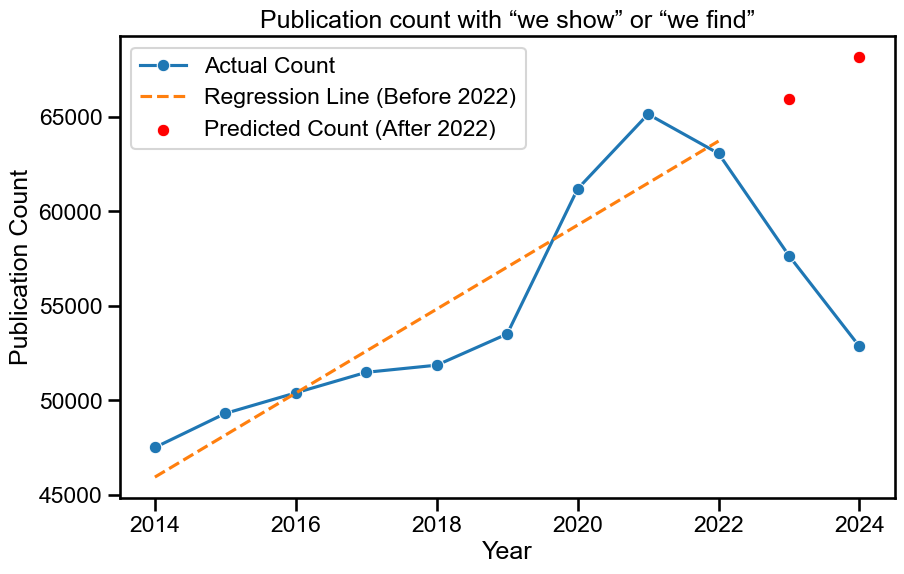

    Year  Count  Predicted_Count    Difference
9   2023  57653     65946.194444  -8293.194444
10  2024  52847     68170.011111 -15323.011111


In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Data
data = {
    "Year": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Count": [47499, 49303, 50392, 51480, 51857, 53509, 61190, 65147, 63067, 57653, 52847]
}

# Create DataFrame
df = pd.DataFrame(data)

# Separate data into before and after 2022
df_before_2022 = df[df["Year"] <= 2022]
df_after_2022 = df[df["Year"] > 2022]

# Perform linear regression on data before 2022
slope, intercept, r_value, p_value, std_err = linregress(df_before_2022["Year"], df_before_2022["Count"])

# Predict counts for years after 2022 based on the regression model
predicted_counts = intercept + slope * df_after_2022["Year"]

# Calculate the difference between actual and predicted counts
df_after_2022["Predicted_Count"] = predicted_counts
df_after_2022["Difference"] = df_after_2022["Count"] - df_after_2022["Predicted_Count"]

# Create DataFrame for regression line
regression_line = pd.DataFrame({
    "Year": df_before_2022["Year"],
    "Regression_Count": intercept + slope * df_before_2022["Year"]
})

# Plot the data and the regression line

# Set the style and font
plt.rcParams["font.family"] = "Arial"
sns.set_context('talk')

plt.figure(figsize=(10,6))
ax = sns.lineplot(x="Year", y="Count", data=df, marker='o', label="Actual Count")
ax = sns.lineplot(x="Year", y="Regression_Count", data=regression_line, label="Regression Line (Before 2022)", linestyle='--')
ax = sns.scatterplot(x="Year", y="Predicted_Count", data=df_after_2022, color='red', label="Predicted Count (After 2022)")
plt.xlabel("Year")
plt.ylabel("Publication Count")
plt.title("Publication count with “we show” or “we find”")
plt.legend()
plt.show()

# Print the differences
print(df_after_2022[["Year", "Count", "Predicted_Count", "Difference"]])
